In [1]:
import pandas as pd
from google.colab import files
import io
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro

In [2]:
uploaded = files.upload()

Saving HousingData.csv to HousingData (1).csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['HousingData.csv']))
df1 = df = pd.read_csv(io.BytesIO(uploaded['HousingData.csv']))
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [4]:
df = df.dropna()
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
5    0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
499  0.17783   0.0   9.69   0.0  0.585  5.569  73.5  2.3999    6  391   
500  0.22438   0.0   9.69   0.0  0.585  6.027  79.7  2.4982    6  391   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [5]:
print(df.corr()['MEDV'])

CRIM      -0.397230
ZN         0.406822
INDUS     -0.510829
CHAS       0.173701
NOX       -0.459054
RM         0.723951
AGE       -0.407470
DIS        0.279547
RAD       -0.416638
TAX       -0.508864
PTRATIO   -0.543809
B          0.347256
LSTAT     -0.743450
MEDV       1.000000
Name: MEDV, dtype: float64


In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
print(X)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
5    0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
499  0.17783   0.0   9.69   0.0  0.585  5.569  73.5  2.3999    6  391   
500  0.22438   0.0   9.69   0.0  0.585  6.027  79.7  2.4982    6  391   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [8]:
print(X.iloc[:,0])

0      0.00632
1      0.02731
2      0.02729
3      0.03237
5      0.02985
        ...   
499    0.17783
500    0.22438
502    0.04527
503    0.06076
504    0.10959
Name: CRIM, Length: 394, dtype: float64


In [9]:
print(list(X.columns.values))

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

In [11]:
reg = linear_model.LinearRegression()

In [12]:
reg.fit(X_train, y_train)

LinearRegression()

In [13]:
reg.coef_

array([-4.68057939e-02,  3.59123750e-02, -7.59439017e-03,  3.46414841e+00,
       -1.82602166e+01,  3.96871148e+00,  2.85430139e-05, -1.43238054e+00,
        2.91108951e-01, -1.13524517e-02, -8.57564219e-01,  1.19632373e-02,
       -5.61757345e-01])

In [14]:
reg.score(X_test, y_test)

0.7661311039010166

In [15]:
y_pred = reg.predict(X_test)

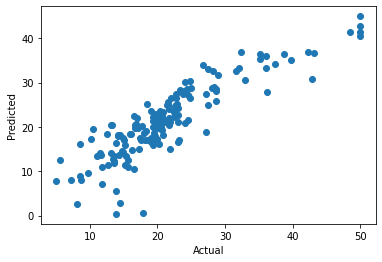

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [17]:
residuals = (y_test - y_pred)

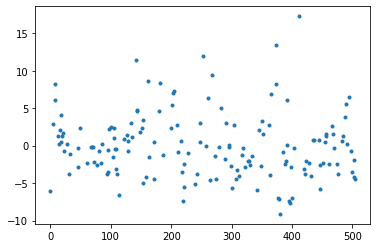

In [18]:
plt.plot(residuals, '.')

In [19]:
res_mean = np.mean(residuals)
res_var = np.var(residuals)
print(res_mean)
print(res_var)

-0.028254497092166368
18.49025196119234


In [20]:
#Normality
shapiro(residuals)

ShapiroResult(statistic=0.9573349356651306, pvalue=9.067211794899777e-05)

In [21]:
################Checking for non-linearity

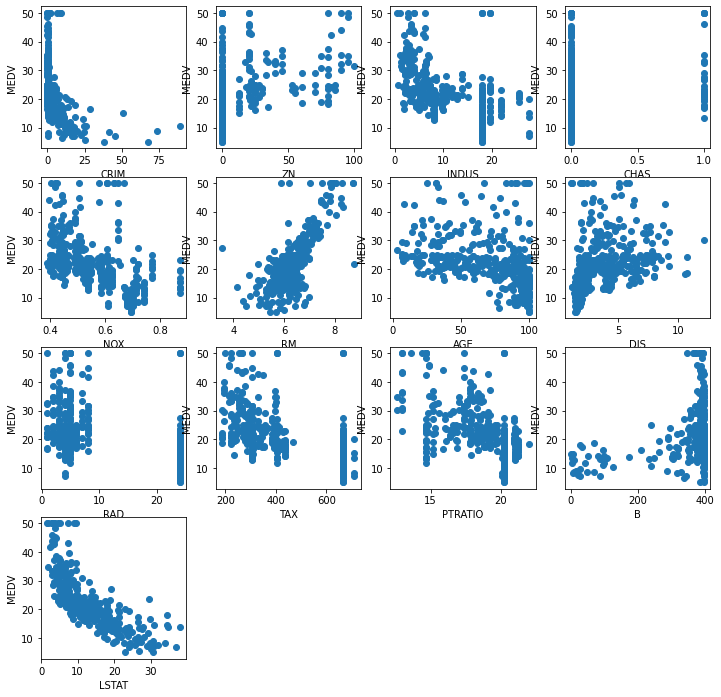

In [22]:
plt.figure(figsize=(12,12))
for i in range(13):
  plt.subplot(4, 4, i+1)
  plt.scatter(X.iloc[:,i], y)
  plt.xlabel(list(X.columns.values)[i])
  plt.ylabel('MEDV')

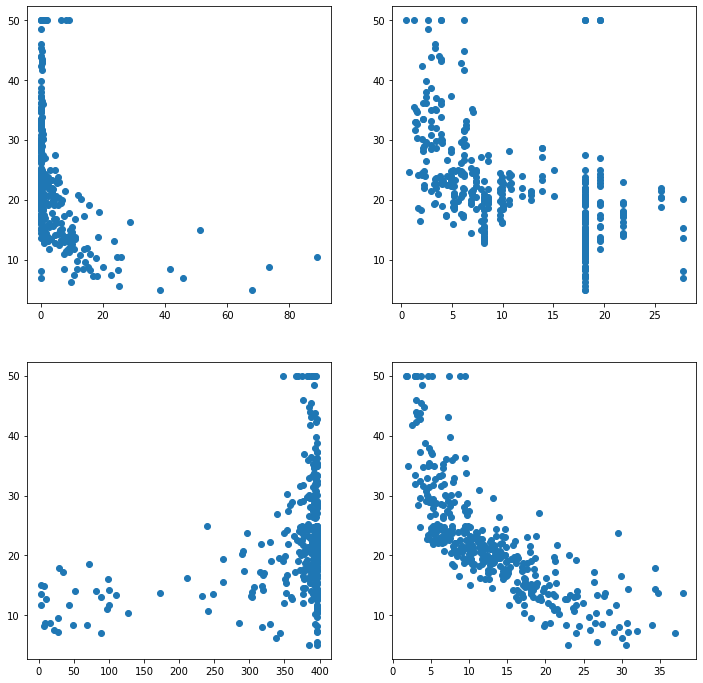

In [23]:
plt.figure(figsize=(12,12))
plt.subplot(2, 2, 1)
plt.scatter(X.iloc[:,0], y)
plt.subplot(2, 2, 2)
plt.scatter(X.iloc[:,2], y)
plt.subplot(2, 2, 3)
plt.scatter(X.iloc[:,11], y)
plt.subplot(2, 2, 4)
plt.scatter(X.iloc[:,12], y)

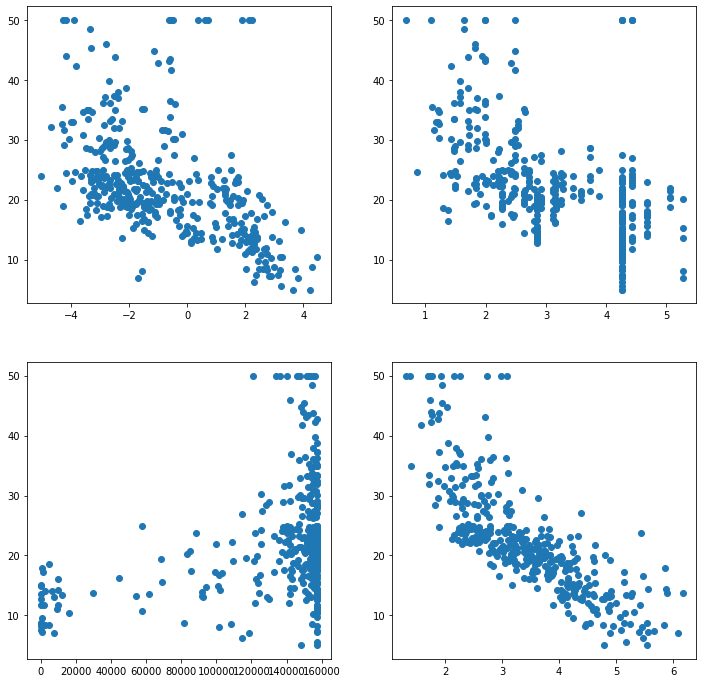

In [24]:
plt.figure(figsize=(12,12))
plt.subplot(2, 2, 1)
plt.scatter(np.log(X.iloc[:,0]), y)
plt.subplot(2, 2, 2)
plt.scatter(np.sqrt(X.iloc[:,2]), y)
plt.subplot(2, 2, 3)
plt.scatter((X.iloc[:,11])**2, y)
plt.subplot(2, 2, 4)
plt.scatter(np.sqrt(X.iloc[:,12]), y)

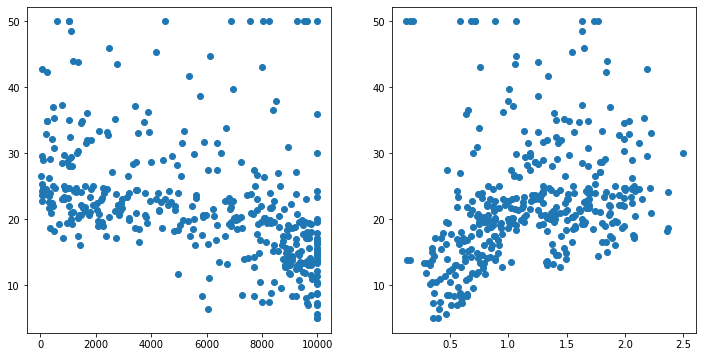

In [25]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter((X.iloc[:,6])**2, y)
plt.subplot(1, 2, 2)
plt.scatter(np.log(X.iloc[:,7]), y)

In [26]:
X2 = X.copy()

In [27]:
#X2["CRIM_sqrt"] = np.sqrt(X.iloc[:,0])
#X2["INDUS_sqrt"] = np.sqrt(X.iloc[:,2])
#X2["B^2"] = X.iloc[:,11]**2
X2["LSTAT_sqrt"] = np.sqrt(X.iloc[:,12])
#X2["DIS_log"] = np.log(X.iloc[:,7])
X2["AGE^2"] = (X.iloc[:,6])**2
'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'

('CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.4,
                                                    random_state=1)

In [29]:
reg = linear_model.LinearRegression()

In [30]:
reg.fit(X_train, y_train)

LinearRegression()

In [31]:
reg.coef_

array([-1.00764853e-01,  1.96288103e-02,  1.45473942e-03,  3.18998227e+00,
       -1.89338574e+01,  2.51605039e+00,  1.99100387e-02, -1.22548475e+00,
        2.63986082e-01, -8.76841545e-03, -7.69030548e-01,  1.19622407e-02,
        1.07390880e+00, -1.29281898e+01,  8.97519232e-05])

In [32]:
reg.score(X_test, y_test)

0.8194909438802959

In [33]:
y_pred = reg.predict(X_test)

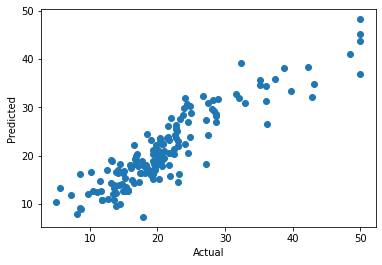

In [34]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [35]:
residuals = (y_test - y_pred)

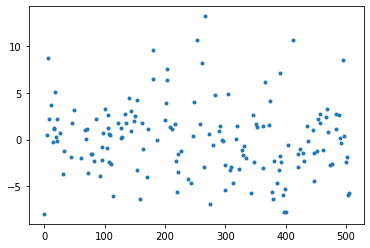

In [36]:
plt.plot(residuals, '.')

In [37]:
res_mean = np.mean(residuals)
res_var = np.var(residuals)
print(res_mean)
print(res_var)

0.04684248746157465
14.269913308205398


In [38]:
#Normality
shapiro(residuals)

ShapiroResult(statistic=0.9731482267379761, pvalue=0.0035611260682344437)